# Single Layer Perceptron Learning

In [44]:
from sklearn import datasets

In [45]:
X,y=datasets.make_blobs(n_samples=150,n_features=2,centers=2,
                        cluster_std=1.05,random_state=2)


In [46]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

'import matplotlib.pyplot as plt\n\nfig = plt.figure(figsize = (10,8))\n\nplt.plot(X[:,0][y==0],X[:,1][y==0], \'r^\')\n\nplt.plot(X[:,0][y==1],X[:,1][y==1], \'bs\')\n\nplt.xlabel("Feature 1")\n\nplt.ylabel("Feature 2")'

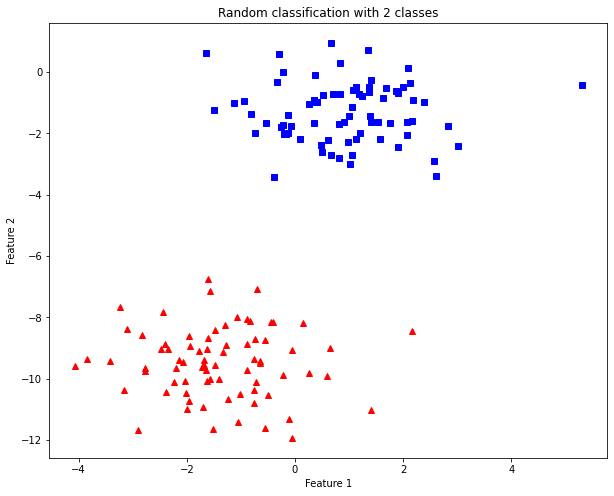

In [47]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],"r^")
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random classification with 2 classes")


"""import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))

plt.plot(X[:,0][y==0],X[:,1][y==0], 'r^')

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")"""

Text(0, 0.5, 'Feature 2')

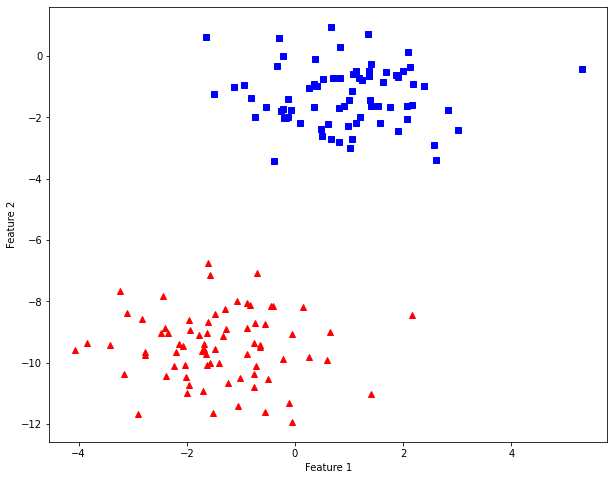

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))

plt.plot(X[:,0][y==0],X[:,1][y==0], 'r^')

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")

In [49]:
import numpy as np

In [50]:
def step_func(z):
    if(z>0):
        return 1.0
    else:
        return 0.0               

In [51]:
def perceptron(X,y,lr,epochs):
    m,n=X.shape
    weights=np.zeros((n+1,1))
    n_miss_list=[]
    for epochs in range(epochs):
        n_miss=0
        for idx,x_i in enumerate(X):
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T,weights))
            if(np.squeeze(y_hat)-y[idx])!=0:
                weights+=lr*((y[idx]-y_hat)*x_i)
                n_miss+=1
        n_miss_list.append(n_miss)
    return weights,n_miss_list

In [52]:
def plot_decision_boundary(X,weights):
    x1=[min(X[:,0]),max(X[:,0])]
    m=-weights[1]/weights[2]
    c=-weights[0]/weights[2]
    x2=m*x1+c
    fig=plt.figure(figsize=(10,8))
    
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r^')

    plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')

    plt.xlabel("Feature 1")

    plt.ylabel("Feature 2")
    plt.title("Perceptron Learning")
    plt.plot(x1,x2,'y-')

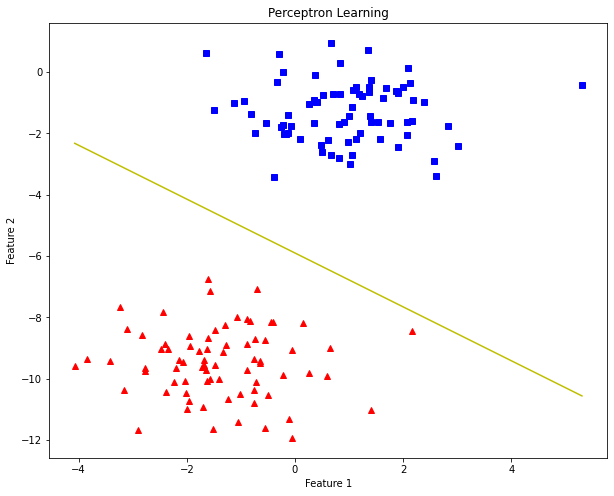

In [53]:
weights,miss_1=perceptron(X,y,0.5,100)
plot_decision_boundary(X,weights)